Epoch 1/100
18/18 [==============================] - 24s 85ms/step - loss: 0.0302
Epoch 2/100
18/18 [==============================] - 1s 82ms/step - loss: 0.0057
Epoch 3/100
18/18 [==============================] - 1s 81ms/step - loss: 0.0035
Epoch 4/100
18/18 [==============================] - 1s 54ms/step - loss: 0.0032
Epoch 5/100
18/18 [==============================] - 1s 66ms/step - loss: 0.0029
Epoch 6/100
18/18 [==============================] - 2s 86ms/step - loss: 0.0027
Epoch 7/100
18/18 [==============================] - 2s 91ms/step - loss: 0.0027
Epoch 8/100
18/18 [==============================] - 1s 83ms/step - loss: 0.0027
Epoch 9/100
18/18 [==============================] - 1s 68ms/step - loss: 0.0025
Epoch 10/100
18/18 [==============================] - 1s 61ms/step - loss: 0.0024
Epoch 11/100
18/18 [==============================] - 1s 45ms/step - loss: 0.0024
Epoch 12/100
18/18 [==============================] - 1s 49ms/step - loss: 0.0021
Epoch 13/100
18/18 [====

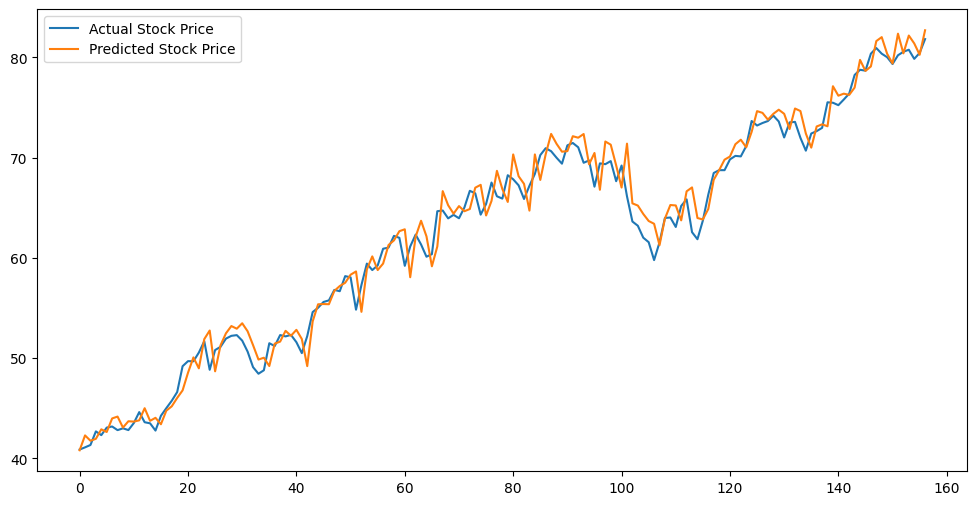

Mean Squared Error: 2.666948704793395
Mean Absolute Error: 1.285659210946804


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    # Select relevant features
    data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'fear-greed']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

def create_dataset(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 3])  # Index 3 corresponds to the 'Close' price
    return np.array(x), np.array(y)

# Define hyperparameters
time_step = 60  # Number of time steps to look back
epochs = 100
batch_size = 32

# Load and preprocess the data
file_path = 'dataset.csv'  # Replace with your dataset
data, scaler = load_data(file_path)

# Create train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size - time_step:]

x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], data.shape[1]-1)), predictions], axis=1))[:, -1]

# Inverse transform y_test
y_test = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], data.shape[1]-1)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Visualize predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Stock Price')
plt.plot(range(len(predictions)), predictions, label='Predicted Stock Price')
plt.legend()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

In [ ]:
from sklearn.metrics import r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²) Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 2.666948704793395
Root Mean Squared Error (RMSE): 1.6330795157595341
Mean Absolute Error (MAE): 1.285659210946804
R-squared (R²) Score: 0.9780625258851964
Mean Absolute Percentage Error (MAPE): 2.096979582456857%


5/5 [==============================] - 0s 20ms/step
Feature ranking:
1. feature 357 (44.289217886877694)
2. feature 355 (23.57179246338577)
3. feature 356 (16.96050581786917)
4. feature 353 (10.557771737550343)
5. feature 359 (7.274429337202436)
6. feature 349 (0.9697321536151463)
7. feature 351 (0.627247675832329)
8. feature 347 (0.44952284990915314)
9. feature 350 (0.43878865137103373)
10. feature 333 (0.24422523693927092)
11. feature 352 (0.2166514749339882)
12. feature 327 (0.1955725496586239)
13. feature 339 (0.1699768588002195)
14. feature 342 (0.14974684785714917)
15. feature 321 (0.1459195041548087)
16. feature 354 (0.13760415049538782)
17. feature 336 (0.12941274176605622)
18. feature 315 (0.10501693294580279)
19. feature 345 (0.10109777677824897)
20. feature 341 (0.09785556642032178)
21. feature 344 (0.08517013048324804)
22. feature 330 (0.08194934309406916)
23. feature 309 (0.07304801084572365)
24. feature 303 (0.053740353437866026)
25. feature 297 (0.03973505424359143)
26. 

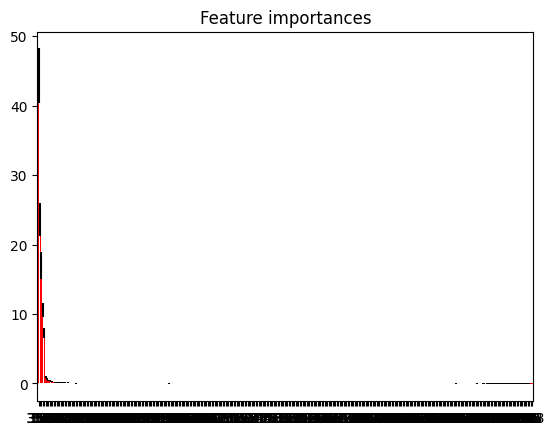

In [ ]:
from sklearn.inspection import permutation_importance

# Function to get model's score
def model_score(estimator, X, y):  # Add estimator and y as arguments
    # Reshape X to 3D for the LSTM model
    X_reshaped = np.reshape(X, (X.shape[0], time_step, x_test.shape[2]))
    preds = estimator.predict(X_reshaped)  # Use estimator instead of the global model variable
    preds_inverse = scaler.inverse_transform(np.concatenate([np.zeros((preds.shape[0], data.shape[1]-1)), preds], axis=1))[:, -1]
    return -mean_squared_error(y, preds_inverse)  # Use y instead of the global y_test variable

# Reshape x_test to 2D for permutation_importance
x_test_2D = np.reshape(x_test, (x_test.shape[0], -1))  # Flatten time steps and features

# Permutation importance
result = permutation_importance(model, x_test_2D, y_test, scoring=model_score, n_repeats=10, random_state=42)

# Display feature importances
importances = result.importances_mean
stds = result.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_test_2D.shape[1]):  # Iterate over features in the 2D array
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Optional: Plot the feature importances
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_test_2D.shape[1]), importances[indices], color="r", yerr=stds[indices], align="center")
plt.xticks(range(x_test_2D.shape[1]), indices)
plt.xlim([-1, x_test_2D.shape[1]])
plt.show()